# Reddit Sentiment Analysis on Popular Movies of 2024
 ---------------------------------------------------
 This project analyzes sentiment on Reddit posts and comments about the favorite movies of 2024.
 It uses the Reddit API to gather comments mentioning popular movie titles and performs sentiment analysis
to determine public opinion. Insights gained can inform discussions on audience sentiment trends.

# Libraries used
 - `praw`: Python Reddit API Wrapper, to fetch comments from Reddit.
 - `TextBlob`: For sentiment analysis on the comments.
 - `pandas`: For data manipulation and analysis.
 - `matplotlib`: For visualizing sentiment trends by movie.

In [7]:
!pip install praw pandas textblob matplotlib

import praw
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
from collections import Counter

# Reddit API credentials
client_id = 'Itp99XIFIbTeNkKiFQuAuw'
client_secret = 'TaBqOZ9_HzrpkoYLW4rpvUKsJ2S3tQ'
user_agent = 'Personal_App by Emotional-Egg-5809'

# Initialize Reddit instance
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)






In [8]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

# Function to analyze sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [9]:
# Fetch Reddit comments
def fetch_reddit_comments(query, limit=100):
    comments = []
    for submission in reddit.subreddit("all").search(query, limit=limit):
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            comments.append(comment.body)
    return comments

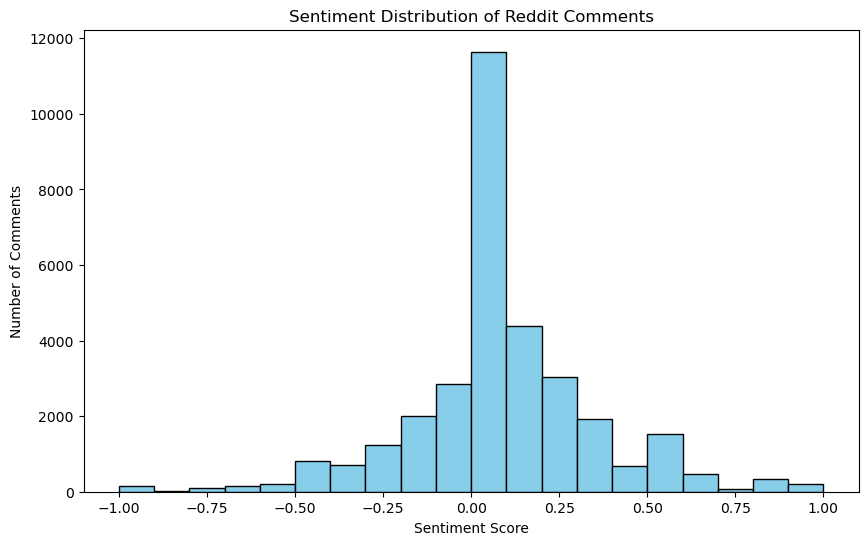

Average Sentiment Score: 0.08


In [10]:
# Main execution
if __name__ == "__main__":
    query = "favorite movie of 2024"
    comments = fetch_reddit_comments(query)

    if comments:
        df = pd.DataFrame(comments, columns=['Comment'])
        df['Cleaned_Comment'] = df['Comment'].apply(clean_text)
        df['Sentiment'] = df['Cleaned_Comment'].apply(get_sentiment)

        # Plot sentiment distribution
        plt.figure(figsize=(10, 6))
        plt.hist(df['Sentiment'], bins=20, color='skyblue', edgecolor='black')
        plt.title('Sentiment Distribution of Reddit Comments')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Number of Comments')
        plt.show()

        # Print average sentiment
        print(f"Average Sentiment Score: {df['Sentiment'].mean():.2f}")
    else:
        print("No comments retrieved.")


In [13]:
# Reddit API credentials
client_id = 'Itp99XIFIbTeNkKiFQuAuw'
client_secret = 'TaBqOZ9_HzrpkoYLW4rpvUKsJ2S3tQ'
user_agent = 'Personal_App by Emotional-Egg-5809'

# Initialize Reddit instance
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

# Define list of popular 2024 movies
movie_titles = ["Avatar", "Furiosa", "Inside Out 2", "The Substance"]  

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

# Function to analyze sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Fetch Reddit comments based on a query
def fetch_reddit_comments(query, limit=100):
    comments = []
    for submission in reddit.subreddit("all").search(query, limit=limit):
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            comments.append(comment.body)
    return comments



Movie Mentions Count: Counter({'Avatar': 4, 'The Substance': 2, 'Inside Out 2': 2, 'Furiosa': 1})
Average Sentiment by Movie: {'Avatar': 0.011897095959595958, 'Furiosa': 0.275, 'Inside Out 2': 0.16499999999999998, 'The Substance': 0.1590909090909091}

Most Mentioned Movie: Avatar
Movie with Highest Average Sentiment: Furiosa


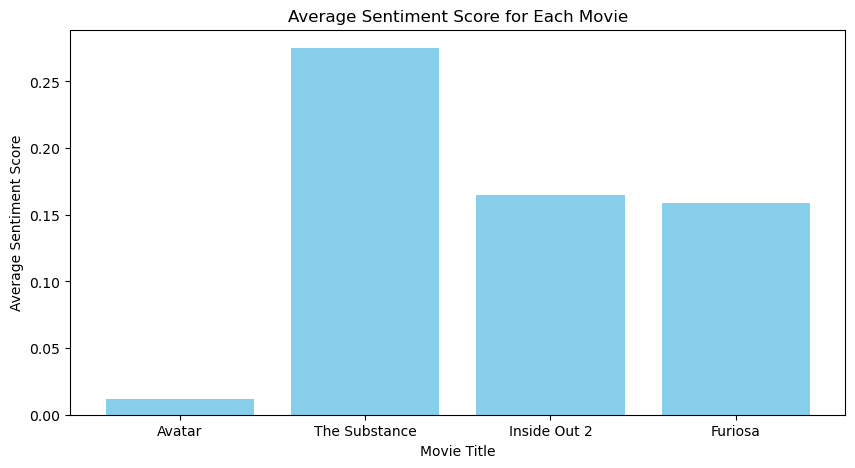

In [14]:
# Main execution
if __name__ == "__main__":
    query = "favorite movie of 2023"
    comments = fetch_reddit_comments(query)

    # Check if comments were retrieved
    if comments:
        # Clean comments and process movie mentions
        df = pd.DataFrame(comments, columns=['Comment'])
        df['Cleaned_Comment'] = df['Comment'].apply(clean_text)
        
        # Initialize counters
        movie_mentions = Counter()
        movie_sentiments = {title: [] for title in movie_titles}

        # Process each comment
        for comment in df['Cleaned_Comment']:
            for title in movie_titles:
                if title.lower() in comment.lower():
                    # Count the mention
                    movie_mentions[title] += 1
                    # Calculate sentiment and add it to the list for the movie
                    sentiment = get_sentiment(comment)
                    movie_sentiments[title].append(sentiment)

        # Calculate average sentiment for each movie
        average_sentiments = {title: (sum(sentiments) / len(sentiments)) if sentiments else 0 
                              for title, sentiments in movie_sentiments.items()}

        # Display results
        print("Movie Mentions Count:", movie_mentions)
        print("Average Sentiment by Movie:", average_sentiments)

        # Find the most mentioned and highest sentiment movie
        most_mentioned_movie = movie_mentions.most_common(1)[0][0]
        highest_sentiment_movie = max(average_sentiments, key=average_sentiments.get)

        print("\nMost Mentioned Movie:", most_mentioned_movie)
        print("Movie with Highest Average Sentiment:", highest_sentiment_movie)

        # Plot average sentiment scores
        plt.figure(figsize=(10, 5))
        plt.bar(movie_mentions.keys(), [average_sentiments[title] for title in movie_titles], color='skyblue')
        plt.title("Average Sentiment Score for Each Movie")
        plt.xlabel("Movie Title")
        plt.ylabel("Average Sentiment Score")
        plt.show()
    else:
        print("No comments retrieved.")
